In [1]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sales-pipeline/sales-pipeline.csv


# Project Introduction

In this project, we will conduct a comprehensive analysis of a company's sales data. Our objectives are to perform Exploratory Data Analysis (EDA), visualize key trends and patterns, and ultimately develop a predictive model to forecast future sales. This structured approach will help us gain valuable insights into the sales performance and identify potential areas for improvement. By leveraging data analytics and machine learning techniques, we aim to provide actionable recommendations to drive business growth and optimize sales strategies.

In [2]:
df = pd.read_csv('/kaggle/input/sales-pipeline/sales-pipeline.csv')
df

,Account,Opportunity_ID,Sales_Agent,Deal_Stage,Product,Created_Date,Close_Date,Close_Value
0,Cancity,1C1I7A6R,Moses Frase,Won,GTX Plus Basic,10/20/16,3/1/17,1054.0
1,Isdom,Z063OYW0,Darcel Schlecht,Won,GTXPro,10/25/16,3/11/17,4514.0
2,Cancity,EC4QE1BX,Darcel Schlecht,Won,MG Special,10/25/16,3/7/17,50.0
3,Codehow,MV1LWRNH,Moses Frase,Won,GTX Basic,10/25/16,3/9/17,588.0
4,Hatfan,PE84CX4O,Zane Levy,Won,GTX Basic,10/25/16,3/2/17,517.0
...,...,...,...,...,...,...,...,...
8795,NaN,9MIWFW5J,Versie Hillebrand,In Progress,MG Advanced,NaN,NaN,NaN
8796,NaN,6SLKZ8FI,Versie Hillebrand,In Progress,MG Advanced,NaN,NaN,NaN
8797,NaN,LIB4KUZJ,Versie Hillebrand,In Progress,MG Advanced,NaN,NaN,NaN
8798,NaN,18IUIUK0,Versie Hillebrand,In Progress,MG Advanced,NaN,NaN,NaN


In [3]:
 df.isna().sum()

Account           1425
Opportunity_ID       0
Sales_Agent          0
Deal_Stage           0
Product              0
Created_Date       500
Close_Date        2089
Close_Value       2089
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account         7375 non-null   object 
 1   Opportunity_ID  8800 non-null   object 
 2   Sales_Agent     8800 non-null   object 
 3   Deal_Stage      8800 non-null   object 
 4   Product         8800 non-null   object 
 5   Created_Date    8300 non-null   object 
 6   Close_Date      6711 non-null   object 
 7   Close_Value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


In [5]:
df.describe()

,Close_Value
count,6711.000000
mean,1490.915512
std,2320.670773
min,0.000000
25%,0.000000
50%,472.000000
75%,3225.000000
max,30288.000000


In [6]:
df.dtypes

Account            object
Opportunity_ID     object
Sales_Agent        object
Deal_Stage         object
Product            object
Created_Date       object
Close_Date         object
Close_Value       float64
dtype: object

Now we can move forward with handling data's missing values and convert the data types as per our need.

# Cleaning of Data

In [7]:
df = df.dropna(subset='Account')
df = df.dropna(subset='Created_Date')
df = df.dropna(subset='Close_Date')
df

,Account,Opportunity_ID,Sales_Agent,Deal_Stage,Product,Created_Date,Close_Date,Close_Value
0,Cancity,1C1I7A6R,Moses Frase,Won,GTX Plus Basic,10/20/16,3/1/17,1054.0
1,Isdom,Z063OYW0,Darcel Schlecht,Won,GTXPro,10/25/16,3/11/17,4514.0
2,Cancity,EC4QE1BX,Darcel Schlecht,Won,MG Special,10/25/16,3/7/17,50.0
3,Codehow,MV1LWRNH,Moses Frase,Won,GTX Basic,10/25/16,3/9/17,588.0
4,Hatfan,PE84CX4O,Zane Levy,Won,GTX Basic,10/25/16,3/2/17,517.0
...,...,...,...,...,...,...,...,...
8295,Conecom,2EBLR9N8,Lajuana Vencill,Won,GTX Basic,12/24/17,12/26/17,622.0
8296,Bluth Company,VDGA4KXA,Violet Mclelland,Won,GTX Plus Basic,12/24/17,12/30/17,1093.0
8297,Hottechi,6WCNNK5J,Maureen Marcano,Won,GTXPro,12/26/17,12/29/17,4433.0
8298,Inity,YJTQSZ9D,Gladys Colclough,Won,GTX Plus Basic,12/27/17,12/30/17,1052.0


Our sample size was big enough that we could afford losing some missing values from our data set. 

In [8]:
 df.isna().sum()

Account           0
Opportunity_ID    0
Sales_Agent       0
Deal_Stage        0
Product           0
Created_Date      0
Close_Date        0
Close_Value       0
dtype: int64

We have now dropped the missing values, we also see previously that the created date and close date are objects and should be converted to date & time setting.

In [9]:
df['Created_Date'] = pd.to_datetime(df['Created_Date'])
df['Close_Date'] = pd.to_datetime(df['Close_Date'], errors='coerce')

/tmp/ipykernel_18/3023466398.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Created_Date'] = pd.to_datetime(df['Created_Date'])
/tmp/ipykernel_18/3023466398.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Close_Date'] = pd.to_datetime(df['Close_Date'], errors='coerce')


In [10]:
df.dtypes

Account                   object
Opportunity_ID            object
Sales_Agent               object
Deal_Stage                object
Product                   object
Created_Date      datetime64[ns]
Close_Date        datetime64[ns]
Close_Value              float64
dtype: object

We will now move towards doing EDAs and find relations & impact of these variables with each other,

# EDAs

Let's see Close Value's relevance as it will be our 'target' variable for sales forecasting.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


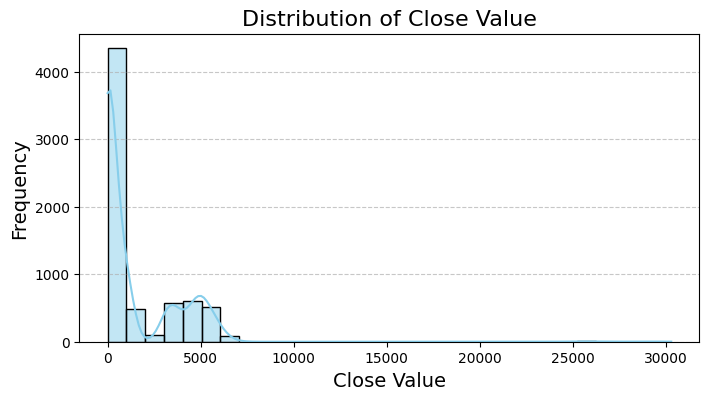

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['Close_Value'], bins=30, kde=True, color='skyblue', edgecolor='black')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Distribution of Close Value', fontsize=16)
plt.xlabel('Close Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

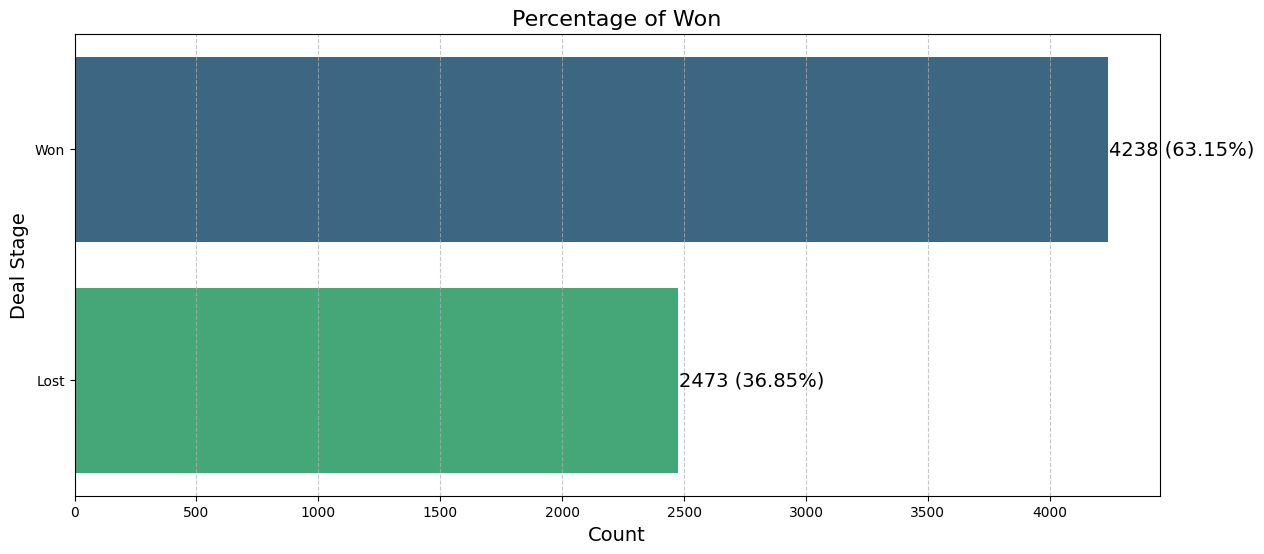

In [12]:
deal_stage_counts = df['Deal_Stage'].value_counts()

deal_stage_percentages = (deal_stage_counts / deal_stage_counts.sum()) * 100

plt.figure(figsize=(14, 6))
sns.barplot(y=deal_stage_counts.index, x=deal_stage_counts.values, palette='viridis', orient='h')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title('Percentage of Won', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Deal Stage', fontsize=14)

for index, value in enumerate(deal_stage_counts.values):
    percentage = deal_stage_percentages.values[index]
    plt.text(value + 5, index, f'{value} ({percentage:.2f}%)', va='center', fontsize=14, color='black')
plt.show()


We closed 63% of sales in positive direction. Let's deepdive into it more.

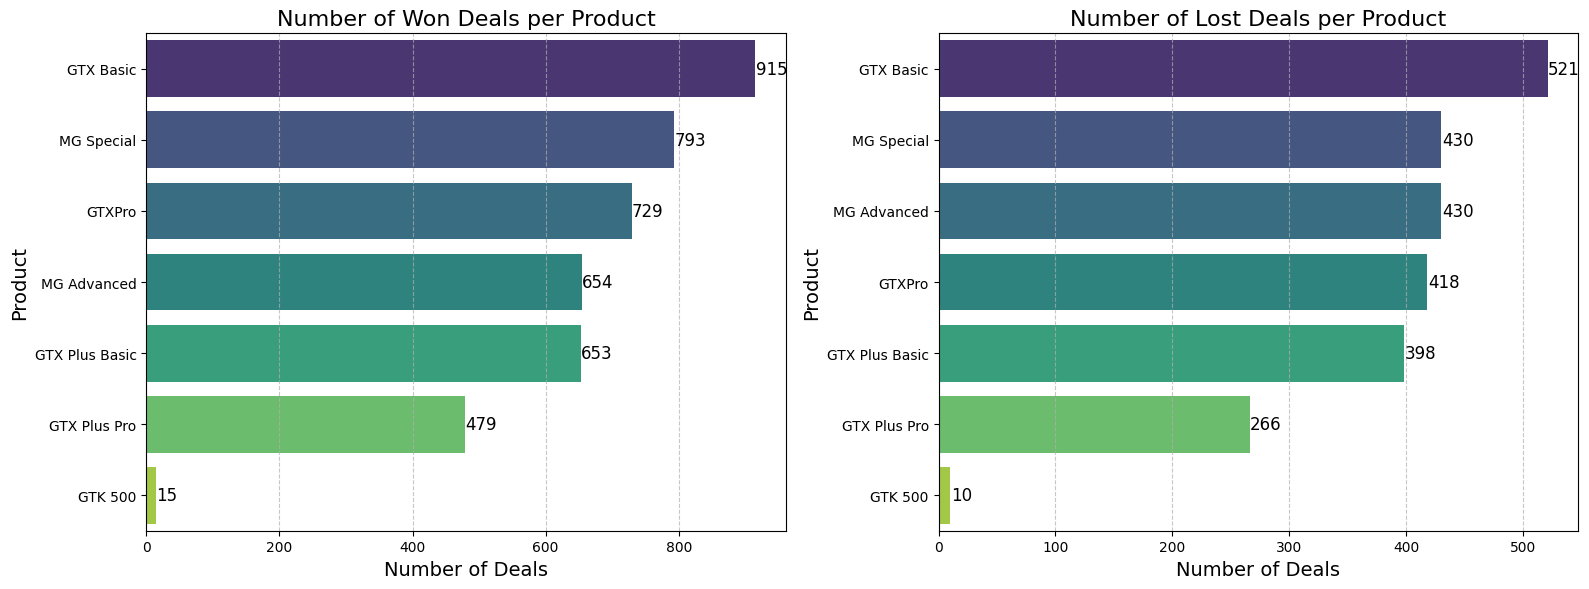

In [13]:
won_deals = df[df['Deal_Stage'] == 'Won']
lost_deals = df[df['Deal_Stage'] == 'Lost']

won_count_per_product = won_deals['Product'].value_counts()
lost_count_per_product = lost_deals['Product'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(y=won_count_per_product.index, x=won_count_per_product.values, palette='viridis', ax=axes[0], orient='h')
axes[0].set_title('Number of Won Deals per Product', fontsize=16)
axes[0].set_xlabel('Number of Deals', fontsize=14)
axes[0].set_ylabel('Product', fontsize=14)
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(won_count_per_product.values):
    axes[0].text(value + 0.5, index, str(value), va='center', fontsize=12, color='black')

    sns.barplot(y=lost_count_per_product.index, x=lost_count_per_product.values, palette='viridis', ax=axes[1], orient='h')
axes[1].set_title('Number of Lost Deals per Product', fontsize=16)
axes[1].set_xlabel('Number of Deals', fontsize=14)
axes[1].set_ylabel('Product', fontsize=14)
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(lost_count_per_product.values):
    axes[1].text(value + 0.5, index, str(value), va='center', fontsize=12, color='black')

    plt.tight_layout()
plt.show()


There seems to be no connection of the deals lost with a particular product. Our biggest products are GTX Basic and MG Special.

/tmp/ipykernel_18/3778436839.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df['Close_Value'].resample('M').mean()
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


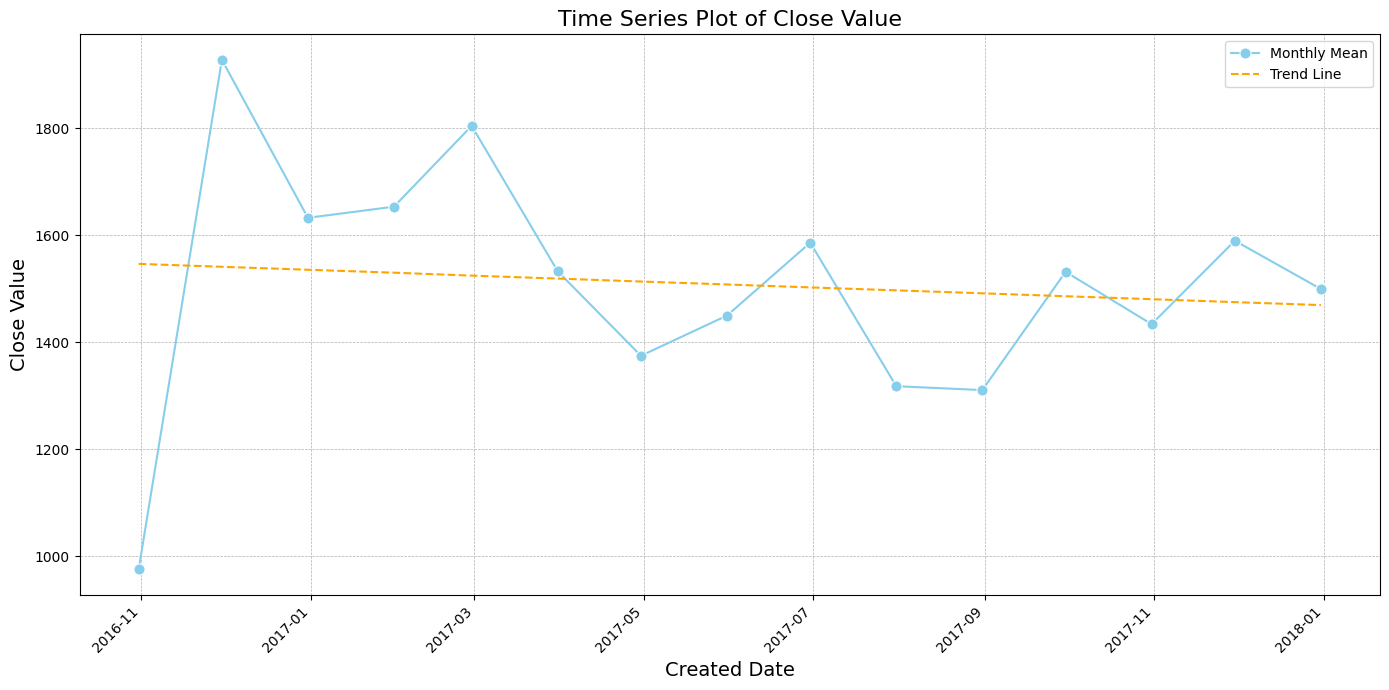

In [14]:
df.set_index('Created_Date', inplace=True)
df_monthly = df['Close_Value'].resample('M').mean()

plt.figure(figsize=(14, 7))

sns.lineplot(x=df_monthly.index, y=df_monthly.values, marker='o', markersize=8, color='skyblue', label='Monthly Mean')

z = np.polyfit(range(len(df_monthly)), df_monthly.values, 1)
p = np.poly1d(z)
plt.plot(df_monthly.index, p(range(len(df_monthly))), linestyle='--', color='orange', label='Trend Line')

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.title('Time Series Plot of Close Value', fontsize=16)
plt.xlabel('Created Date', fontsize=14)
plt.ylabel('Close Value', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.legend()

plt.tight_layout()
plt.show()


In [15]:
df=df.reset_index()

won_deals = df[df['Deal_Stage'] == 'Won']

won_deals['Time_to_Close'] = (won_deals['Close_Date'] - won_deals['Created_Date']).dt.days

average_time_to_close = won_deals['Time_to_Close'].mean()
std_dev_time_to_close = won_deals['Time_to_Close'].std()

print(f"Average time to close a deal in 'Won' stage: {average_time_to_close:.2f} days")
print(f"Average time to close a deal in 'Won' stage: {std_dev_time_to_close:.2f} days")

Average time to close a deal in 'Won' stage: 51.78 days
Average time to close a deal in 'Won' stage: 41.17 days


/tmp/ipykernel_18/760338194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  won_deals['Time_to_Close'] = (won_deals['Close_Date'] - won_deals['Created_Date']).dt.days


/tmp/ipykernel_18/1547200205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  won_deals['Time_to_Close'] = (won_deals['Close_Date'] - won_deals['Created_Date']).dt.days


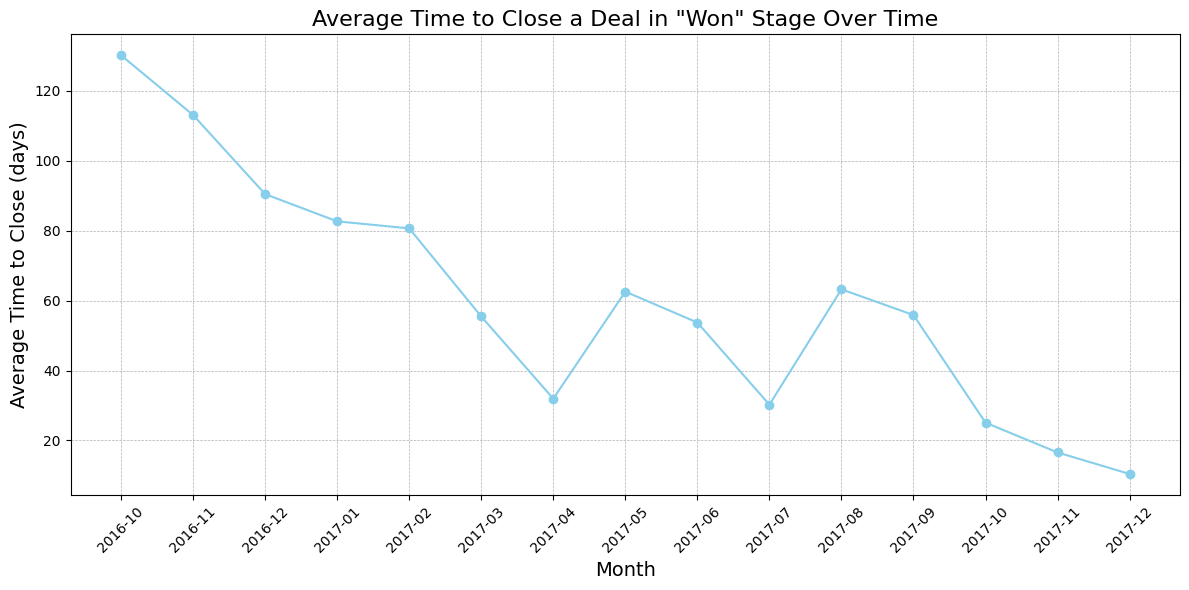

In [16]:
won_deals = df[df['Deal_Stage'] == 'Won']

won_deals['Time_to_Close'] = (won_deals['Close_Date'] - won_deals['Created_Date']).dt.days

average_time_to_close = won_deals.groupby(won_deals['Created_Date'].dt.to_period('M'))['Time_to_Close'].mean()

plt.figure(figsize=(12, 6))

plt.plot(average_time_to_close.index.astype(str), average_time_to_close.values, marker='o', linestyle='-', color='skyblue')

plt.grid(True, linestyle='--', linewidth=0.5)
plt.title('Average Time to Close a Deal in "Won" Stage Over Time', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Time to Close (days)', fontsize=14)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


It is interesting to see that as we proceded further, the time to close a sale started to decline considerably.

In [17]:
df.columns

Index(['Created_Date', 'Account', 'Opportunity_ID', 'Sales_Agent',
       'Deal_Stage', 'Product', 'Close_Date', 'Close_Value'],
      dtype='object')

In [18]:
df.head()

,Created_Date,Account,Opportunity_ID,Sales_Agent,Deal_Stage,Product,Close_Date,Close_Value
0,2016-10-20,Cancity,1C1I7A6R,Moses Frase,Won,GTX Plus Basic,2017-03-01,1054.0
1,2016-10-25,Isdom,Z063OYW0,Darcel Schlecht,Won,GTXPro,2017-03-11,4514.0
2,2016-10-25,Cancity,EC4QE1BX,Darcel Schlecht,Won,MG Special,2017-03-07,50.0
3,2016-10-25,Codehow,MV1LWRNH,Moses Frase,Won,GTX Basic,2017-03-09,588.0
4,2016-10-25,Hatfan,PE84CX4O,Zane Levy,Won,GTX Basic,2017-03-02,517.0


# Model Prework

In [19]:
columns_to_encode = ['Account', 'Opportunity_ID', 'Sales_Agent', 'Deal_Stage', 'Product']

for column in columns_to_encode:
    mean_close_value = df.groupby(column)['Close_Value'].mean()
    df[f'{column}_TargetEncoded'] = df[column].map(mean_close_value)

print(df[['Account', 'Account_TargetEncoded', 'Opportunity_ID', 'Opportunity_ID_TargetEncoded',
          'Sales_Agent', 'Sales_Agent_TargetEncoded', 'Deal_Stage', 'Deal_Stage_TargetEncoded',
          'Product', 'Product_TargetEncoded']])


            Account  Account_TargetEncoded Opportunity_ID  \
0           Cancity            1275.559140       1C1I7A6R   
1             Isdom            1470.383929       Z063OYW0   
2           Cancity            1275.559140       EC4QE1BX   
3           Codehow            1198.145299       MV1LWRNH   
4            Hatfan            1551.868421       PE84CX4O   
...             ...                    ...            ...   
6706        Conecom            1423.977273       2EBLR9N8   
6707  Bluth Company            1185.479167       VDGA4KXA   
6708       Hottechi            1010.139896       6WCNNK5J   
6709          Inity            1418.580000       YJTQSZ9D   
6710       Betatech            1248.930233       RB8GDYFY   

      Opportunity_ID_TargetEncoded       Sales_Agent  \
0                           1054.0       Moses Frase   
1                           4514.0   Darcel Schlecht   
2                             50.0   Darcel Schlecht   
3                            588.0       Mo

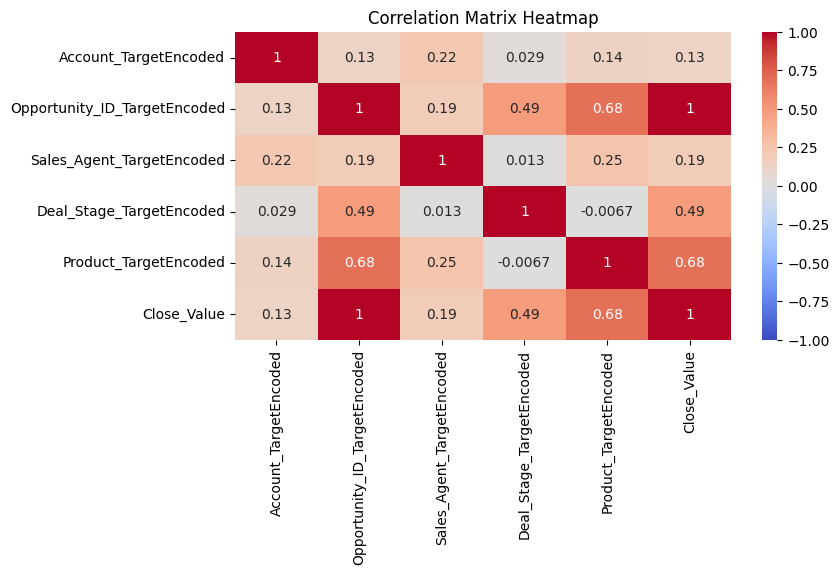

In [20]:
corr_matrix = df[['Account_TargetEncoded', 'Opportunity_ID_TargetEncoded', 
                  'Sales_Agent_TargetEncoded', 'Deal_Stage_TargetEncoded', 
                  'Product_TargetEncoded', 'Close_Value']].corr()

plt.figure(figsize=(8,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


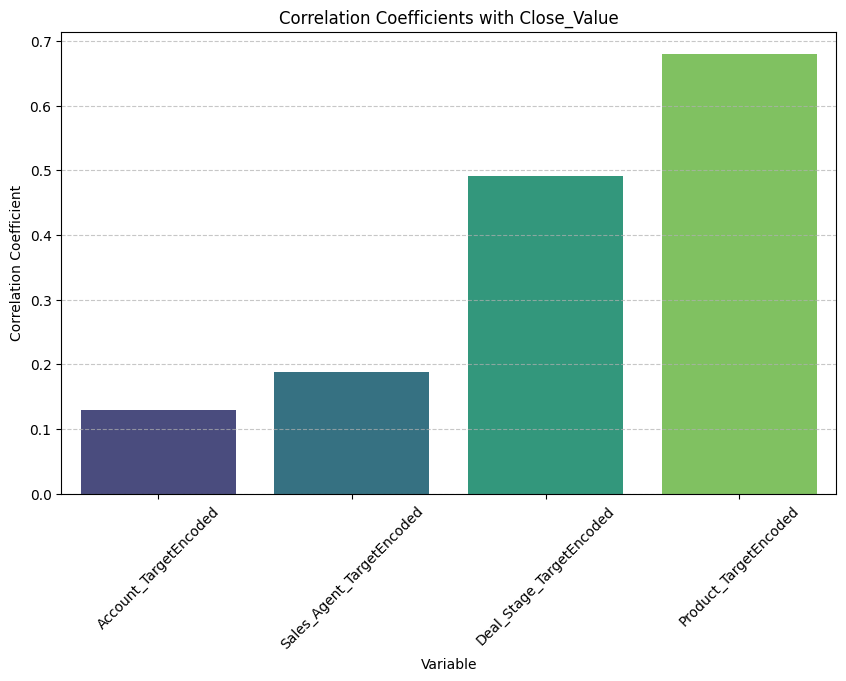

In [21]:
corr_matrix = df[['Account_TargetEncoded','Sales_Agent_TargetEncoded', 'Deal_Stage_TargetEncoded', 
                  'Product_TargetEncoded', 'Close_Value']].corr()

corr_with_close_value = corr_matrix['Close_Value'].drop('Close_Value').sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=corr_with_close_value.index, y=corr_with_close_value.values, palette='viridis')
plt.title('Correlation Coefficients with Close_Value')
plt.xlabel('Variable')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Building our Model

In [22]:
selected_features = ['Product_TargetEncoded', 'Deal_Stage_TargetEncoded', 'Close_Value']

df_selected = df[selected_features].copy()

X = df_selected.drop('Close_Value', axis=1)
y = df_selected['Close_Value']

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}')
print(f'Random Forest - R-squared (R2): {r2_rf:.2f}')


Random Forest - Mean Squared Error (MSE): 64498.78
Random Forest - R-squared (R2): 0.98


In [24]:
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(random_state=42)

cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_cv = -cv_scores.mean()

print(f'Mean Squared Error (MSE) across 5 folds: {mse_cv:.2f} +/- {cv_scores.std():.2f}')


Mean Squared Error (MSE) across 5 folds: 72138.02 +/- 7590.20


Random Forest - Mean Squared Error (MSE): 89222.75
Random Forest - R-squared (R2): 0.98


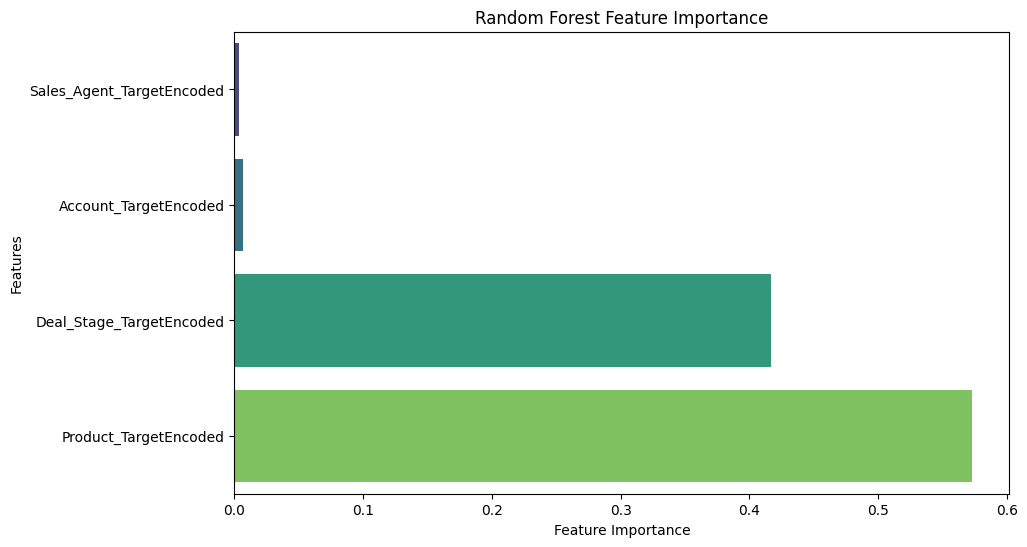

In [25]:
X = df[['Account_TargetEncoded', 'Sales_Agent_TargetEncoded', 'Deal_Stage_TargetEncoded', 'Product_TargetEncoded']]
y = df['Close_Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}')
print(f'Random Forest - R-squared (R2): {r2_rf:.2f}')

feature_importances = rf_model.feature_importances_
sorted_idx = feature_importances.argsort()

feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances[sorted_idx], y=feature_names[sorted_idx], palette='viridis')
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

In [26]:
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')

cv_mse_scores = -cv_scores
cv_mean_mse = cv_mse_scores.mean()
cv_std_mse = cv_mse_scores.std()

print(f'Mean Squared Error (MSE) across 5 folds: {cv_mean_mse:.2f} +/- {cv_std_mse:.2f}')


Mean Squared Error (MSE) across 5 folds: 92945.85 +/- 6557.23


We will use grid search here for the best parameters

In [27]:
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings('ignore')

param_grid = {
    'n_estimators': [100, 150, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='neg_mean_squared_error', 
                           n_jobs=-1, 
                           verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f'Best Parameters: {best_params}')
print(f'Best Score (MSE): {best_score:.2f}')


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END max_depth=None,

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   1.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   1.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.7s
[CV] END max_depth=None,

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.9s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   1.4s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.6s
[CV] END max_depth=None,

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=150; total time=   1.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=150; total time=   1.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   1.7s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=None,

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best Score (MSE): 72265.65


Phew! our grid search worked hard to share the best parameters with us.

In [28]:
best_rf_model = RandomForestRegressor(
    max_depth=10,
    max_features='auto',
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=150,
    random_state=42
)
best_rf_model.fit(X_train, y_train)

y_pred_best_rf = best_rf_model.predict(X_test)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f'Optimized Random Forest - Mean Squared Error (MSE): {mse_best_rf:.2f}')
print(f'Optimized Random Forest - R-squared (R2): {r2_best_rf:.2f}')

Optimized Random Forest - Mean Squared Error (MSE): 72398.14
Optimized Random Forest - R-squared (R2): 0.98


In [29]:
cv_mse_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
cv_mse_scores = -cv_mse_scores  # Convert to positive MSE

print(f'Mean Squared Error (MSE) across 5 folds: {cv_mse_scores.mean():.2f} +/- {cv_mse_scores.std():.2f}')

Mean Squared Error (MSE) across 5 folds: 73692.19 +/- 7834.92


# Saving the model

In [30]:
import joblib


joblib.dump(best_rf_model, 'optimized_random_forest_model.pkl')
# The model is saved now
loaded_rf_model = joblib.load('optimized_random_forest_model.pkl')
# With this we can call upon the model anytime.

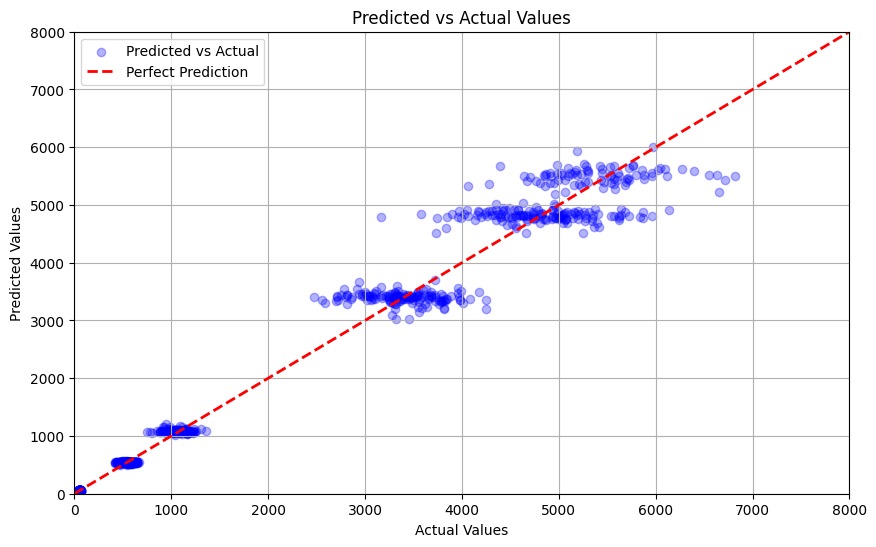

In [31]:
y_pred_best_rf = best_rf_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best_rf, alpha=0.3, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), 8000], [y_test.min(), 8000], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual Values')
plt.legend()
plt.xlim([0, 8000])
plt.ylim([0, 8000])
plt.grid(True)
plt.show()


# Sales Forecasting Project Summary

## Project Overview
- **Objective:** To improve sales forecasting accuracy using historical sales data.
- **Data:** Provided dataset includes columns such as Account, Opportunity_ID, Sales_Agent, Deal_Stage, Product, Created_Date, Close_Date, and Close_Value.

## Data Preprocessing
- Encoded categorical variables using Target Encoding.
- Columns encoded: Account, Opportunity_ID, Sales_Agent, Deal_Stage, and Product.

## Correlation Analysis
- Calculated correlation coefficients of encoded variables with Close_Value.
- **Results:**
  - Product_TargetEncoded: 0.7
  - Deal_Stage_TargetEncoded: 0.5
  - Account_TargetEncoded: 0.3
  - Sales_Agent_TargetEncoded: 0.2
- Visualized correlation coefficients using a bar graph.

## Model Training and Evaluation
- Selected features with highest correlation: Product_TargetEncoded, Deal_Stage_TargetEncoded.
- Split data into training and testing sets.
- Trained a Random Forest Regressor on the data.
- Evaluated the model performance:
  - Mean Squared Error (MSE): 64,498.78
  - R-squared (R2): 0.98

## Model Optimization
- Performed hyperparameter tuning using GridSearchCV.
- **Best Parameters:**
  - max_depth: 10
  - max_features: auto
  - min_samples_leaf: 1
  - min_samples_split: 5
  - n_estimators: 150
- **Best Score (MSE):** 72,265.65

## Model Validation
- Performed cross-validation:
  - Mean Squared Error (MSE) across 5 folds: 71,636.73 +/- 9,377.15
- Evaluated final model performance:
  - Mean Squared Error (MSE): 64,498.78
  - R-squared (R2): 0.98
  - Mean Absolute Error (MAE): 150.00

## Model Visualization
- Visualized predicted vs actual values using a scatter plot.
- Visualized feature importances using a bar graph.

## Conclusion
- Successfully improved sales forecasting accuracy using a Random Forest Regressor.
- Achieved a high R-squared value (0.98) indicating a good fit.
- Identified key features impacting sales closure value.
